# Import Required Libraries
Import pandas and any other necessary libraries for data analysis.

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Clean Data
Load the player statistics CSV file, drop rows with missing values, and convert numeric columns to appropriate data types.

In [2]:
# Load the CSV file
file_path = "../data/player_stats.csv"  # Adjust the path if necessary
data = pd.read_csv(file_path)

# Data Cleaning
# Drop rows with missing values
cleaned_data = data.dropna()

# Convert numeric columns to appropriate data types
numeric_columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                   'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
for col in numeric_columns:
    if col in cleaned_data.columns:
        cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

# Drop rows with invalid numeric data
cleaned_data = cleaned_data.dropna(subset=numeric_columns)

C:\Users\beris\AppData\Local\Temp\ipykernel_16428\3253838069.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')


# Top 10 Players by Points Per Game
Use pandas to find and display the top 10 players by points per game.

In [3]:
# Top 10 players by points per game
top_scorers = cleaned_data.nlargest(10, 'PTS')[['Player', 'PTS']]
print("Top 10 Players by Points Per Game:")
print(top_scorers)

Top 10 Players by Points Per Game:
                    Player   PTS
0              Joel Embiid  34.7
1              Luka Dončić  33.9
2    Giannis Antetokounmpo  30.4
3  Shai Gilgeous-Alexander  30.1
4            Jalen Brunson  28.7
5             Devin Booker  27.1
6             Kevin Durant  27.1
7             Jayson Tatum  26.9
8             De'Aaron Fox  26.6
9         Donovan Mitchell  26.6


# Average Statistics by Position
Group the data by player position and calculate the mean for numeric columns.

In [4]:
# Average statistics by position
average_stats_by_position = cleaned_data.groupby('Pos')[numeric_columns].mean()
print("\nAverage Statistics by Position:")
print(average_stats_by_position)


Average Statistics by Position:
           Age          G         GS         MP        FG        FGA  \
Pos                                                                    
C    25.600000  70.800000  69.500000  32.180000  7.650000  13.630000   
PF   28.692308  69.538462  51.769231  30.923077  7.576923  15.030769   
PG   28.000000  69.142857  56.214286  31.742857  7.735714  16.464286   
SF   27.428571  74.428571  56.142857  31.900000  6.571429  13.742857   
SG   26.181818  70.181818  47.272727  30.709091  6.263636  13.436364   

          FG%        3P       3PA       3P%  ...       FT%       ORB  \
Pos                                          ...                       
C    0.582000  0.690000  1.950000  0.244900  ...  0.745000  2.750000   
PF   0.502769  1.876923  4.807692  0.382538  ...  0.786692  1.153846   
PG   0.470786  2.450000  6.507143  0.373500  ...  0.824000  0.707143   
SF   0.476143  1.814286  4.885714  0.367143  ...  0.828286  0.871429   
SG   0.464182  2.318182  6.072

# Distribution of Players by Team
Count the number of players for each team and display the distribution.

In [5]:
# Distribution of players by team
players_by_team = cleaned_data['Team'].value_counts()
print("\nNumber of Players by Team:")
print(players_by_team)


Number of Players by Team:
Team
DAL    4
BOS    4
LAC    4
MIN    4
SAC    3
ORL    3
OKC    3
MIL    3
NYK    2
PHO    2
PHI    2
GSW    2
ATL    2
LAL    2
CHI    2
CLE    2
NOP    2
IND    2
MIA    2
DEN    1
TOR    1
SAS    1
CHO    1
2TM    1
Name: count, dtype: int64


# Save Cleaned Data
Save the cleaned data to a new CSV file for future use.

In [6]:
# Save cleaned data to a new CSV file
cleaned_data.to_csv("../data/cleaned_player_stats.csv", index=False)
print("\nCleaned data saved to 'cleaned_player_stats.csv'")


Cleaned data saved to 'cleaned_player_stats.csv'


C:\Users\beris\AppData\Local\Temp\ipykernel_16428\479086315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PTS', y='Player', data=top_scorers, palette='viridis')


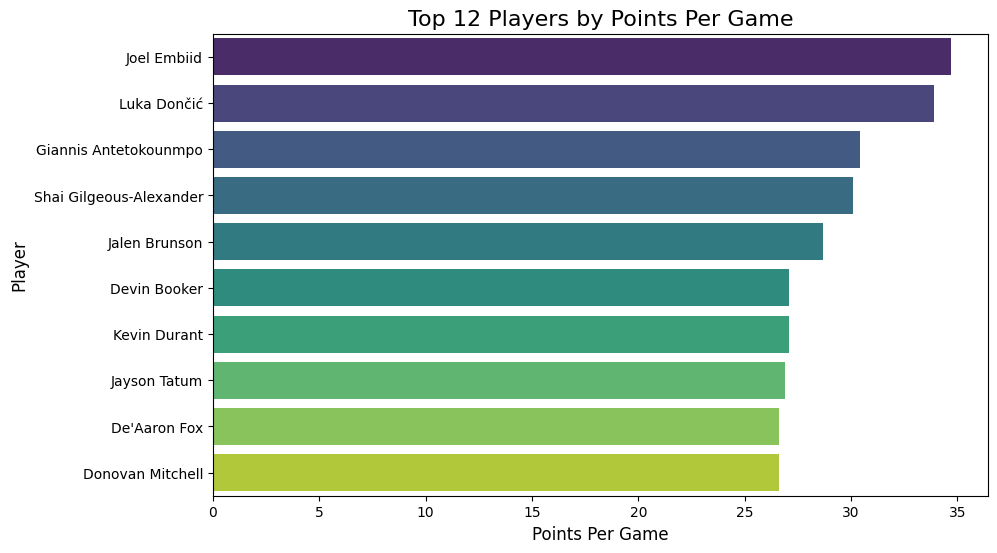

In [7]:
# Bar plot for top 12 players by points per game
plt.figure(figsize=(10, 6))
sns.barplot(x='PTS', y='Player', data=top_scorers, palette='viridis')
plt.title('Top 12 Players by Points Per Game', fontsize=16)
plt.xlabel('Points Per Game', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.show()

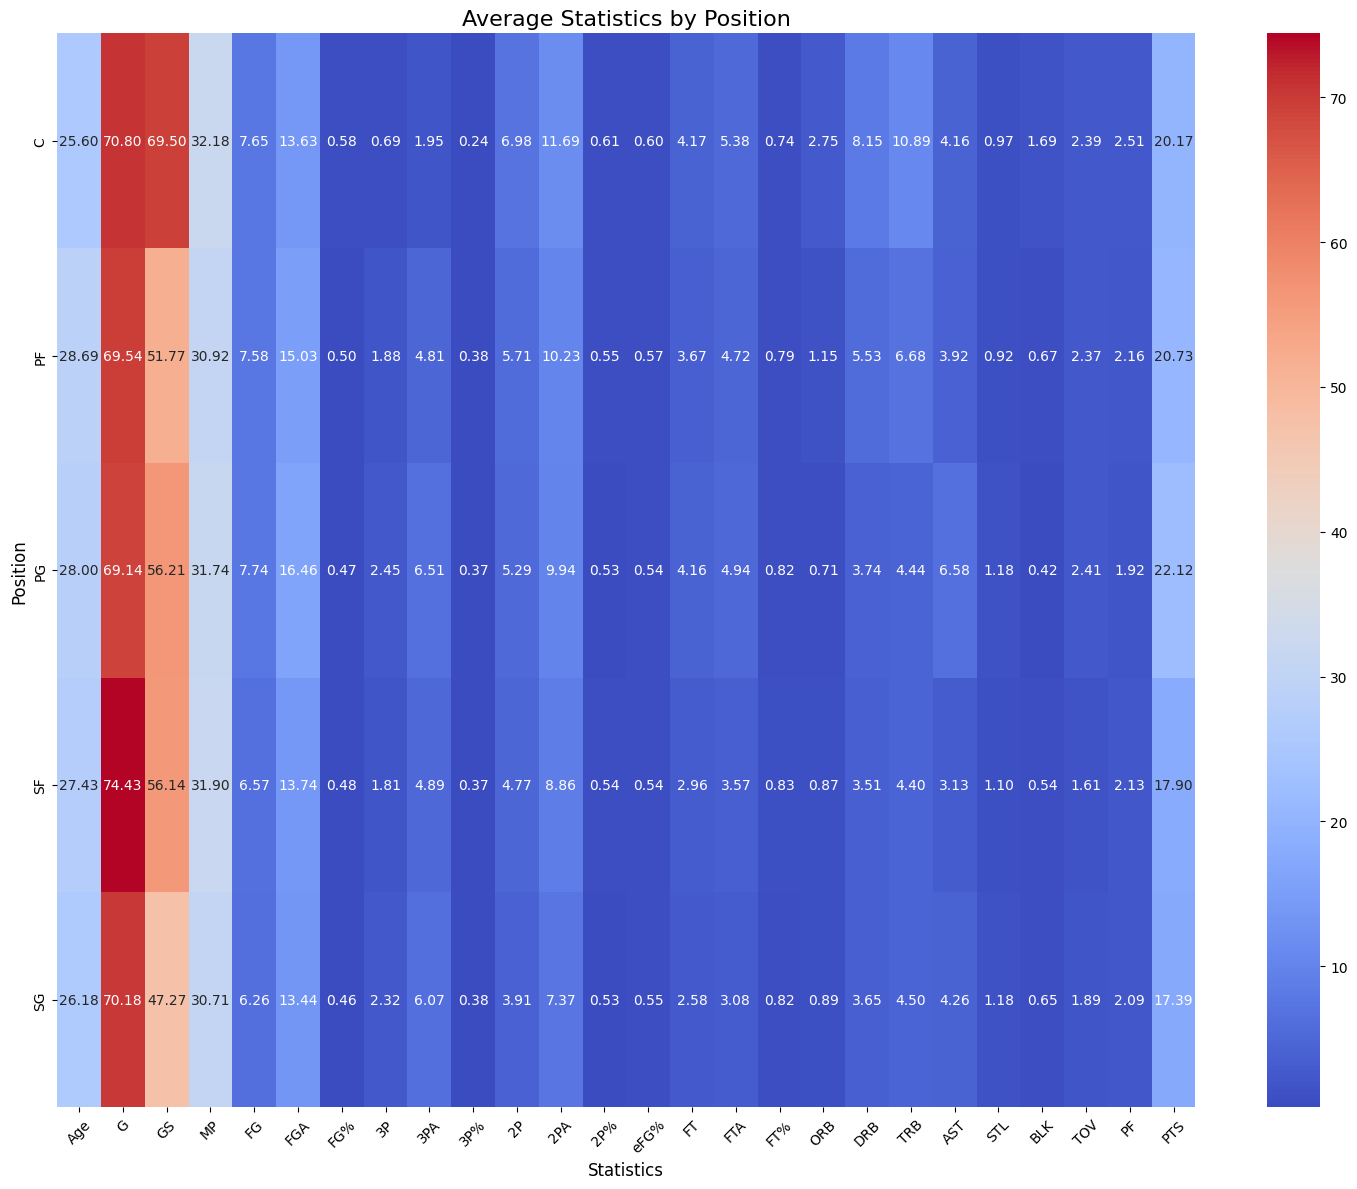

In [9]:
# Bar plot for average statistics by position
plt.figure(figsize=(15, 12))
sns.heatmap(average_stats_by_position[numeric_columns], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Statistics by Position', fontsize=16)
plt.xlabel('Statistics', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

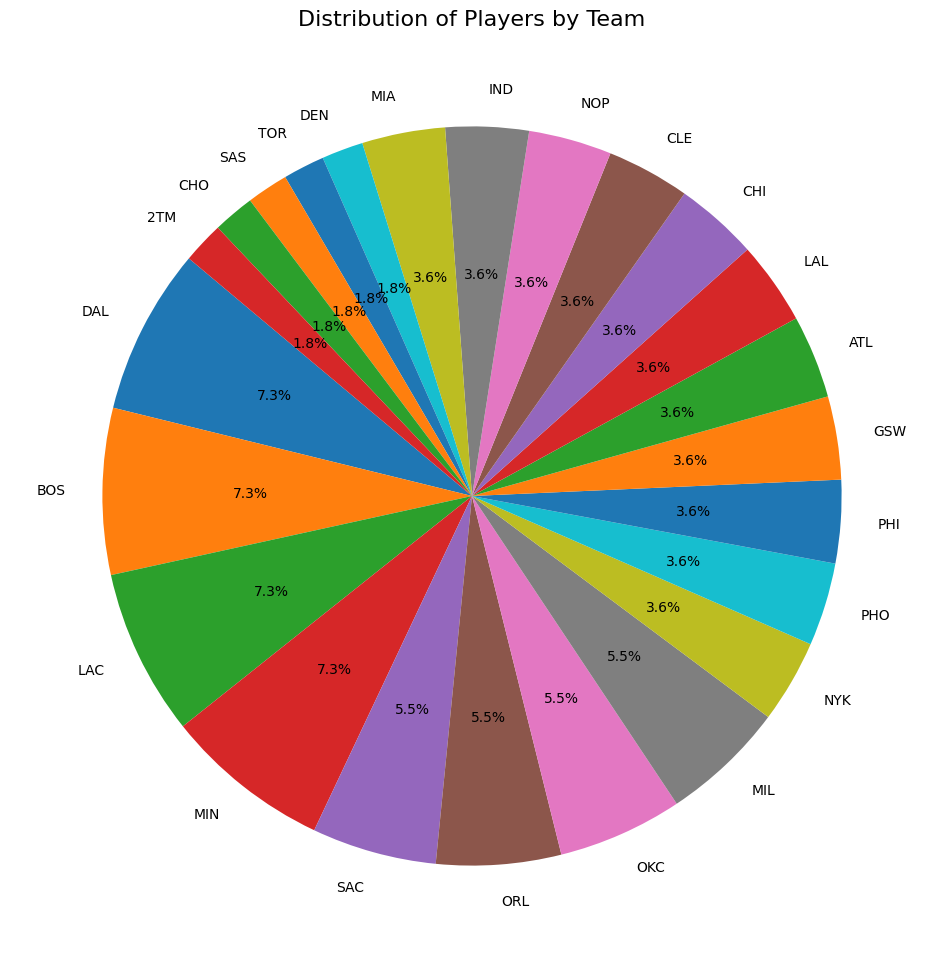

In [11]:
# Pie chart for distribution of players by team
plt.figure(figsize=(12, 12))
players_by_team.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=False)
plt.title('Distribution of Players by Team', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.show()

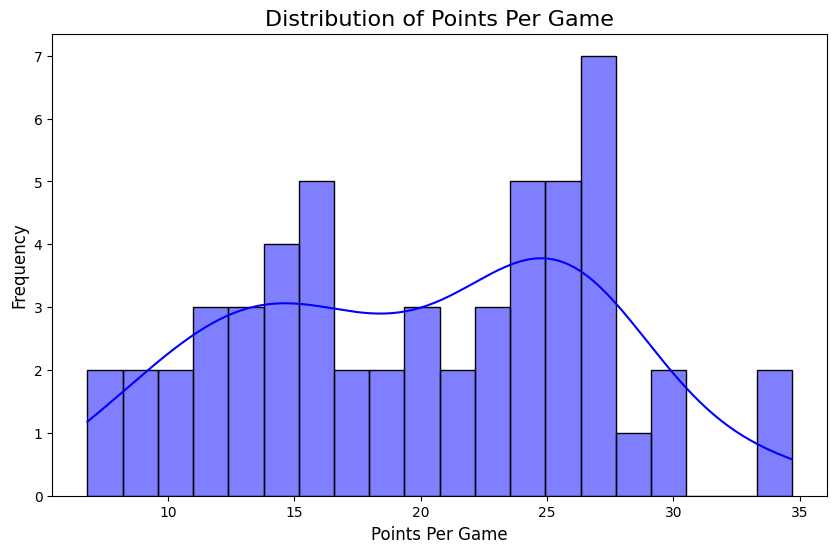

In [17]:
# Histogram for points per game distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['PTS'], bins=20, kde=True, color='blue')
plt.title('Distribution of Points Per Game', fontsize=16)
plt.xlabel('Points Per Game', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:

# Histogram for asist per game distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['AST'], bins=20, kde=True, color='blue')
plt.title('Distribution of Asist Per Game', fontsize=16)
plt.xlabel('Asist Per Game', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()